#População dos Estados

##Planilha Censo do IBGE

In [1]:
import pandas as pd
import os #usar funcionalidades que são dependentes de sistema operacional

# Definir o caminho para o diretório temporário onde o repositório será clonado
clone_path = '/tmp/Estudos_Pandas'
populacao_excel_file_path = os.path.join(clone_path, 'POP2022_Municipios.xls')
emissoes_excel_file_path = os.path.join(clone_path, '1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx')
repository_url = 'https://github.com/YuriArduino/Estudos_Pandas.git'
branch_name = 'data-tests'

# Install required libraries
print("Instalando xlrd e openpyxl...")
!pip install xlrd openpyxl

# Remover o diretório do repositório se ele já existir para garantir um clone limpo
# Isso evita o erro "destination path '...' already exists and is not an empty directory"
if os.path.exists(clone_path):
    print(f"Removendo diretório existente: {clone_path}")
    !rm -rf {clone_path}

# Clonar o repositório do GitHub, especificando o branch 'data-tests'
print(f"Clonando repositório do branch '{branch_name}' para {clone_path}...")
!git clone --branch {branch_name} {repository_url} {clone_path}

# Mudar para o diretório do repositório clonado
print(f"Mudando para o diretório: {clone_path}")
%cd {clone_path}

# Puxar os arquivos grandes (LFS) do repositório.
# Este passo é crucial pois os arquivos Excel estão armazenados usando Git LFS.
print("Puxando arquivos LFS...")
!git lfs pull

# Voltar para o diretório de conteúdo original do Colab
print("Voltando para o diretório original (/content/)...")
%cd /content/

# --- Carregar o arquivo de População ---
if os.path.exists(populacao_excel_file_path):
    print(f"Arquivo Excel de População encontrado em: {populacao_excel_file_path}")
    # Ler o arquivo Excel para um DataFrame pandas
    # Motor 'xlrd' para arquivos .xls
    print("Lendo o arquivo Excel de População com pandas...")
    populacao_estados = pd.read_excel(populacao_excel_file_path, engine='xlrd', header = 1, skipfooter = 34)

    # Exibir as primeiras 5 linhas do DataFrame de População
    print("Exibindo as primeiras linhas do DataFrame de População:")
    display(populacao_estados.head())
else:
    print(f"Erro: O arquivo Excel de População não foi encontrado em {populacao_excel_file_path} após o clone e LFS pull.")
    print("Por favor, verifique se o nome do arquivo e o branch estão corretos.")

# --- Carregar o arquivo de Emissões ---
if os.path.exists(emissoes_excel_file_path):
    print(f"Arquivo Excel de Emissões encontrado em: {emissoes_excel_file_path}")
    # Ler o arquivo Excel para um DataFrame pandas
    # Motor 'openpyxl' para arquivos .xlsx
    print("Lendo o arquivo Excel de Emissões com pandas...")
    # Using a try-except block to handle potential errors if the sheet name is incorrect
    try:
        emissoes_gases = pd.read_excel(emissoes_excel_file_path, engine='openpyxl', sheet_name = 'GEE Estados')
         # Exibir as primeiras 5 linhas do DataFrame de Emissões
        print("Exibindo as primeiras linhas do DataFrame de Emissões:")
        display(emissoes_gases.head())
    except ValueError as e:
        print(f"Erro ao ler a planilha 'GEE Estados': {e}")
        print("Verificando os nomes das planilhas disponíveis...")
        excel_file = pd.ExcelFile(emissoes_excel_file_path, engine='openpyxl')
        print("Planilhas disponíveis:", excel_file.sheet_names)
        print("Por favor, verifique se o nome da planilha 'GEE Estados' está correto ou escolha uma das planilhas disponíveis.")


else:
    print(f"Erro: O arquivo Excel de Emissões não foi encontrado em {emissoes_excel_file_path} após o clone e LFS pull.")
    print("Por favor, verifique se o nome do arquivo e o branch estão corretos.")

Instalando xlrd e openpyxl...
Removendo diretório existente: /tmp/Estudos_Pandas
Clonando repositório do branch 'data-tests' para /tmp/Estudos_Pandas...
Cloning into '/tmp/Estudos_Pandas'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 115 (delta 48), reused 10 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 5.27 MiB | 8.82 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Mudando para o diretório: /tmp/Estudos_Pandas
/tmp/Estudos_Pandas
Puxando arquivos LFS...
Voltando para o diretório original (/content/)...
/content
Arquivo Excel de População encontrado em: /tmp/Estudos_Pandas/POP2022_Municipios.xls
Lendo o arquivo Excel de População com pandas...
Exibindo as primeiras linhas do DataFrame de População:


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237


Arquivo Excel de Emissões encontrado em: /tmp/Estudos_Pandas/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx
Lendo o arquivo Excel de Emissões com pandas...


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Exibindo as primeiras linhas do DataFrame de Emissões:


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


###População por estado

In [2]:
populacao_estados.groupby('UF').sum(numeric_only = True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


In [3]:
populacao_estados['POPULAÇÃO'].astype(int)

ValueError: invalid literal for int() with base 10: '461.748(1)'

O resultado foi um erro, mas não foi um problema na escrita do código. É indicado que não foi possível fazer a conversão de determinado valor da coluna: 461.748(1). Esses parênteses no número atrapalham a conversão.

`Metódo contains()`

In [4]:
#populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]
# O aviso de sintaxe 'invalid escape sequence '\(' ocorre porque a barra invertida '\' é usada dentro de uma string
# que não é uma string bruta (raw string). Em strings normais, '\' é usado para sequências de escape como '\n'.
# Para expressões regulares, é recomendado usar strings brutas (r'...') para evitar este aviso,
# garantindo que '\' seja tratado como um caractere literal.
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains(r'\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


##Tratando dados

###Remover caracteres com método replace() e assign()

In [5]:
populacao_estados = populacao_estados.assign()

###Removendo parênteses

In [6]:
populacao_estados = populacao_estados.assign(
    populacao_sem_parenteses = populacao_estados['POPULAÇÃO'])

In [7]:
populacao_estados = populacao_estados.assign(
    populacao_sem_parenteses = populacao_estados[
        'POPULAÇÃO'].replace(r'\(\d{1,2}\)', '', regex = True))

###Removendo ponto separador de milhar

In [8]:
populacao_estados = populacao_estados.assign(
    populacao_sem_parenteses = populacao_estados[
        'POPULAÇÃO'].replace(r'\(\d{1,2}\)', '', regex = True),
    populacao = lambda x: x.loc[:, 'populacao_sem_parenteses']
)

In [9]:
populacao_estados = populacao_estados.assign(
    populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace(
        r'\(\d{1,2}\)', '', regex = True),
    populacao = lambda x : x.loc[:,
                                  'populacao_sem_parenteses'].replace(r'\.', '', regex = True)
)

###Conferindo resultado

In [10]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains(r'\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


###Convertendo população em inteiro

In [11]:
populacao_estados = populacao_estados.astype({'populacao':'int64'})

###População por estado

In [12]:
populacao_estados = populacao_estados.groupby('UF')[['populacao']].sum().reset_index()
populacao_estados

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


## Para saber mais: Expressões Regulares (Regex) no Python e no Pandas

As **expressões regulares** (regex) são combinações de caracteres que representam **padrões de texto**.
Com elas, é possível procurar, validar ou transformar informações em strings de forma muito flexível.

Por exemplo:

* Encontrar todos os números dentro de um texto.
* Validar se um CPF tem o formato correto.
* Remover símbolos indesejados de uma coluna de DataFrame.

---

### 🔹 Caracteres comuns

Qualquer caractere literal é um padrão simples:

* `3` procura o dígito “3”.
* `a` procura a letra “a”.
* `palavra` procura exatamente a palavra “palavra”.

---

### 🔹 Caracteres especiais (padrões avançados)

| Caractere | Função                     | Exemplo de uso            |
| --------- | -------------------------- | ------------------------- |
| `.`       | Qualquer caractere         | `c.s` → casa, ces, cis    |
| `*`       | 0 ou mais repetições       | `go*` → g, go, goo, gooo  |
| `?`       | 0 ou 1 repetição           | `colou?r` → color, colour |
| `{m}`     | Exatamente *m* repetições  | `\d{3}` → 123, 456        |
| `{m,n}`   | Entre *m* e *n* repetições | `a{2,4}` → aa, aaa, aaaa  |
| `[]`      | Conjunto de caracteres     | `[amk]` → a, m, k         |
| `\d`      | Um dígito de 0 a 9         | `\d+` → 15, 2025          |
| `\w`      | Um caractere alfanumérico  | `\w+` → casa, texto123    |

---

### 🔹 Regex no Pandas

O Pandas permite aplicar regex em métodos como:

#### 1. **Filtrar valores com `str.contains()`**

```python
# Seleciona linhas onde a coluna 'POPULAÇÃO' contém parênteses
df[df['POPULAÇÃO'].str.contains(r'\(', na=False)]
```

#### 2. **Substituir valores com `replace()`**

```python
# Remove tudo que não for dígito da coluna 'POPULAÇÃO'
df['POPULAÇÃO'] = df['POPULAÇÃO'].replace(r'\D', '', regex=True)
```

#### 3. **Extrair partes do texto com `str.extract()`**

```python
# Extrai apenas os números de uma string
df['NÚMERO'] = df['POPULAÇÃO'].str.extract(r'(\d+)')
```

---

### 📌 Observação importante

* Sempre que usar regex no Python, é **boa prática escrever como raw string** (`r'...'`).
  Isso evita warnings com barras invertidas (`\n`, `\(`, etc.).

---

## 📊 Métodos do Pandas com Regex

| Método               | Para que serve                                                                                  | Exemplo prático                                                            | Resultado esperado                                     |
| -------------------- | ----------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------- | ------------------------------------------------------ |
| **`str.contains()`** | Verifica se um padrão existe na string (retorna **True/False**). Usado para **filtrar linhas**. | `python df[df['POPULAÇÃO'].str.contains(r'\(', na=False)] `                | Seleciona apenas linhas onde a coluna contém `(`.      |
| **`replace()`**      | Substitui partes da string que casam com o regex. Útil para **limpeza de dados**.               | `python df['POPULAÇÃO'] = df['POPULAÇÃO'].replace(r'\D', '', regex=True) ` | Remove todos os caracteres que não são dígitos (`\D`). |
| **`str.extract()`**  | Extrai parte da string que corresponde ao regex. Retorna nova coluna com o valor capturado.     | `python df['NÚMERO'] = df['POPULAÇÃO'].str.extract(r'(\d+)') `             | Cria coluna contendo apenas os números extraídos.      |

---

📌 Resumindo:

* **`contains()`** → *para encontrar padrões*
* **`replace()`** → *para limpar ou substituir*
* **`extract()`** → *para capturar trechos específicos*

---


##Unindo DataFrames



In [13]:
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissoes_gases = emissoes_gases.drop(columns = 'Emissão / Remoção / Bunker')
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)
colunas_info =list(emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)
emissoes_por_ano = emissoes_gases.melt(
    id_vars = colunas_info, value_vars = colunas_emissao,
    var_name = 'Ano' , value_name = 'Emissão'
    )
emissoes_por_ano.groupby('Gás')
emissao_por_gas = emissoes_por_ano.groupby(
    'Gás')[['Emissão']].sum().sort_values(
        'Emissão', ascending = False
        )
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual = media_emissao_anual.pivot_table(index = 'Ano', columns = 'Gás', values = 'Emissão')

###Emissão dos estados para ano mais recente

In [14]:
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()
emissao_estados

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


##União de tabelas com o método merge()

In [15]:
dados_agrupados = pd.merge(emissao_estados, populacao_estados, left_on = 'Estado', right_on = 'UF')
dados_agrupados

,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


###Gráfico de emissão e população

<Axes: xlabel='populacao'>

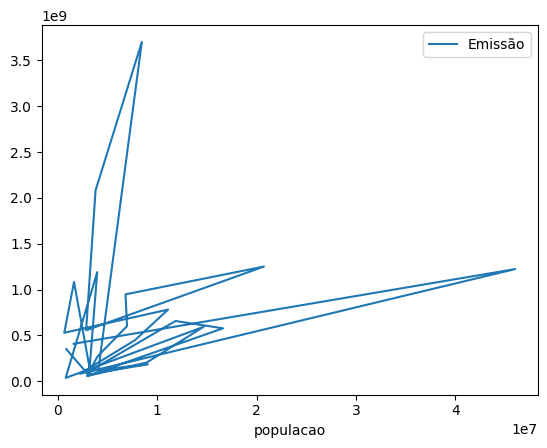

In [16]:
dados_agrupados.plot(x = 'populacao', y= 'Emissão')

`Scatter plot`

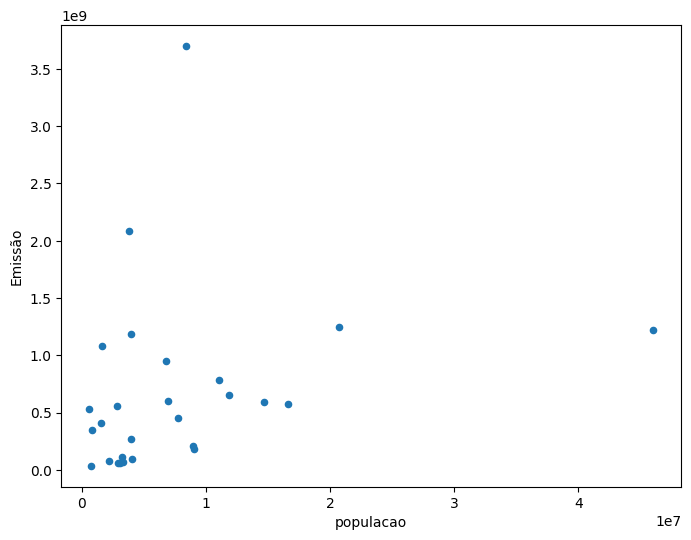

In [17]:
dados_agrupados.plot(x = 'populacao', y= 'Emissão', kind = 'scatter', figsize=(8,6));

### Para saber mais: métodos de junção em pandas

O pandas oferece ferramentas para **combinar e mesclar DataFrames**, permitindo trabalhar com dados de diferentes fontes em um único conjunto. Os principais métodos são: **concat**, **join** e **merge**.

---

#### 1. Concatenação (`concat`)

* Combina DataFrames mantendo colunas e índices.
* Pode ser **vertical** (empilhamento) ou **horizontal** (lado a lado).

**Sintaxe:**

```python
pd.concat([dataframe1, dataframe2, ...], axis=0)  # vertical
pd.concat([dataframe1, dataframe2, ...], axis=1)  # horizontal
```

* `axis=0`: concatenação vertical (linhas)
* `axis=1`: concatenação horizontal (colunas)

---

#### 2. Join (`join`)

* Une dois DataFrames com base nos **índices** ou em uma **coluna específica**.
* Útil quando os DataFrames têm colunas iguais ou diferentes.

**Sintaxe:**

```python
dataframe1.join(dataframe2, on='nome_coluna', how='left')
```

* `on`: coluna em comum usada como chave
* `how`: tipo de junção → `'left'`, `'right'`, `'inner'`, `'outer'`

> Se `on` não for especificado, a união é feita pelos índices.

---

#### 3. Merge (`merge`)

* Método mais completo para unir DataFrames, suportando **colunas com nomes iguais ou diferentes**.

**Sintaxe:**

```python
dataframe1.merge(
    dataframe2,
    on='nome_coluna',           # se coluna tiver o mesmo nome
    how='inner',                # tipo de junção: 'left', 'right', 'inner', 'outer', 'cross'
    left_on='col_df1',          # se colunas tiverem nomes diferentes
    right_on='col_df2'
)
```

* `on`: coluna comum nos dois DataFrames
* `how`: tipo de junção
* `left_on` e `right_on`: colunas específicas de cada DataFrame quando os nomes diferem

---

####**Quadro visual comparativo**



| Método     | Como funciona                                                                       | Quando usar                                                                     | Observações                                                                  |
| ---------- | ----------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| **concat** | Empilha ou coloca DataFrames lado a lado                                            | Quando você quer **apenas juntar dados** sem se preocupar com chaves ou índices | Axis controla a direção: `axis=0` (linhas), `axis=1` (colunas)               |
| **join**   | Une DataFrames com base em **índices** ou uma **coluna comum**                      | Quando você tem DataFrames com índices ou colunas que servem de chave           | Útil para fusão rápida, menos flexível que merge                             |
| **merge**  | Une DataFrames usando **colunas ou índices**, suportando nomes iguais ou diferentes | Quando precisa de **junção complexa** com diferentes tipos de chave             | Mais poderoso e flexível, permite `inner`, `outer`, `left`, `right`, `cross` |

-------------



#Emissões per capita

In [18]:
import plotly.express as px

In [19]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado')

In [20]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado', opacity = 0)

##Emissão per capita

In [21]:
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['populacao']).sort_values('emissao_per_capita', ascending = False)
dados_agrupados

,Estado,Emissão,UF,populacao,emissao_per_capita
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928
2,AM,1.189649e+09,AM,3952262,301.004463
26,TO,4.082159e+08,TO,1584306,257.662300
11,MS,5.551278e+08,MS,2833742,195.899220
9,MA,9.476324e+08,MA,6800605,139.345312
8,GO,6.008081e+08,GO,6950976,86.435075


In [22]:
px.bar(data_frame = dados_agrupados, x = 'Estado', y = 'emissao_per_capita')

In [23]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado', size = 'emissao_per_capita')